In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("./clean_data.csv")
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


**a**. Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

In [ ]:
# Take a random sample of 25 observations
sample = data.sample(n=25)

In [ ]:
# Calculating mean and highest Glucose values for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

In [ ]:
# Calculating mean and highest Glucose values for the population
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

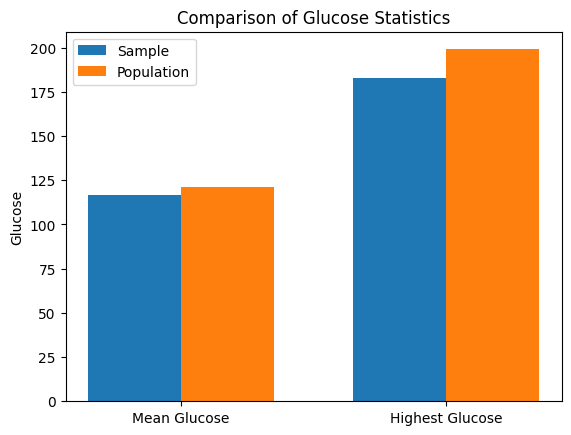

In [ ]:
# Creating a bar chart to compare mean and highest Glucose values
labels = ['Mean Glucose', 'Highest Glucose']
sample_values = [sample_mean_glucose, sample_highest_glucose]
population_values = [population_mean_glucose, population_highest_glucose]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample_values, width, label='Sample')
rects2 = ax.bar(x + width/2, population_values, width, label='Population')

ax.set_ylabel('Glucose')
ax.set_title('Comparison of Glucose Statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

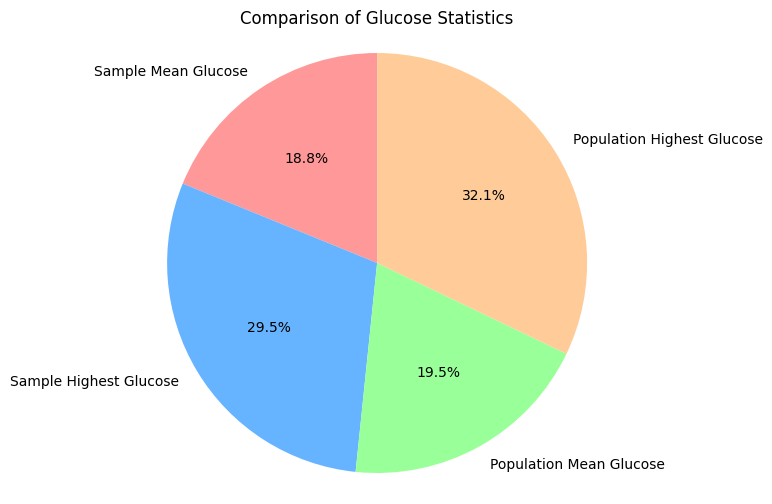

In [ ]:
# Creating a pie chart to compare mean and highest Glucose values
labels = ['Sample Mean Glucose', 'Sample Highest Glucose', 'Population Mean Glucose', 'Population Highest Glucose']
sizes = [sample_mean_glucose, sample_highest_glucose, population_mean_glucose, population_highest_glucose]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of Glucose Statistics')
plt.axis('equal')

plt.show()

b. Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.

In [ ]:
# Calculate the 98th percentile of BMI for the sample
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)

# Calculate the 98th percentile of BMI for the population
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

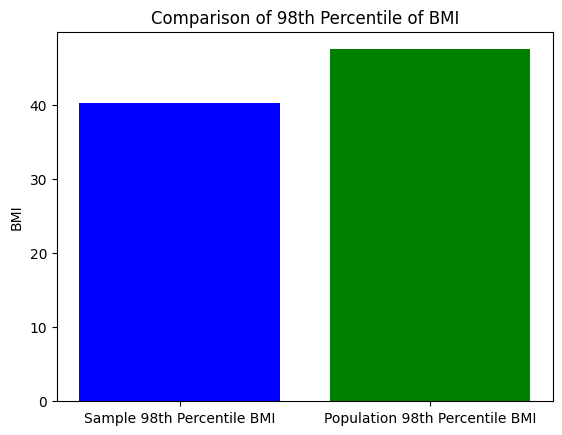

In [ ]:
# Create a bar chart to compare the 98th percentile of BMI
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
values = [sample_98th_percentile_bmi, population_98th_percentile_bmi]

plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('BMI')
plt.title('Comparison of 98th Percentile of BMI')
plt.show()


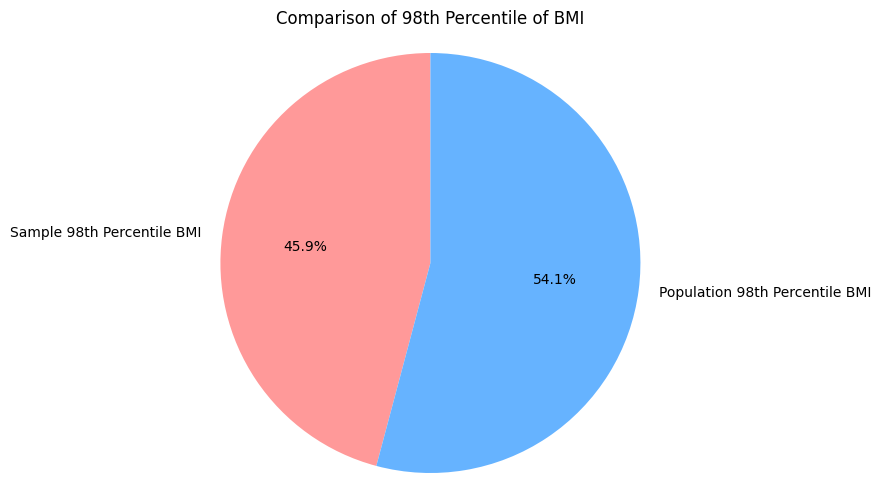

In [ ]:
# Create a pie chart to compare the 98th percentile of BMI
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
sizes = [sample_98th_percentile_bmi, population_98th_percentile_bmi]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of 98th Percentile of BMI')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

**c. Using Bootstrap**

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 500 bootstrap samples
n_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

for _ in range(n_samples):
    bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_std_devs.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 50))  # 50th percentile (median)

# Calculate average mean, standard deviation, and percentile across all bootstrap samples
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std_dev = np.mean(bootstrap_std_devs)
avg_bootstrap_percentile = np.mean(bootstrap_percentiles)

# Calculate mean, standard deviation, and percentile for BloodPressure in the population
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_bp = np.percentile(data['BloodPressure'], 50)  # 50th percentile (median)

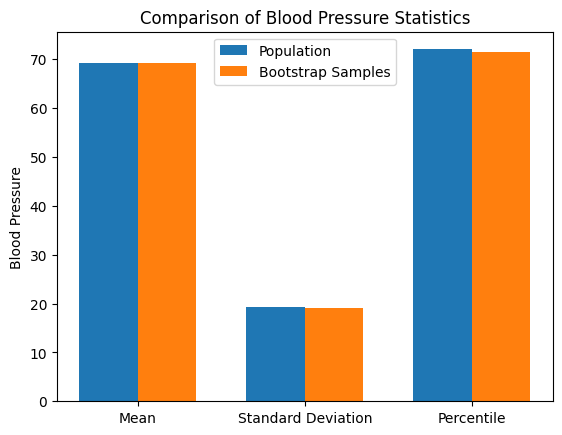

In [ ]:
# Create bar chart to compare mean, standard deviation, and percentile
labels = ['Mean', 'Standard Deviation', 'Percentile']
population_values = [population_mean_bp, population_std_dev_bp, population_percentile_bp]
bootstrap_values = [avg_bootstrap_mean, avg_bootstrap_std_dev, avg_bootstrap_percentile]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, population_values, width, label='Population')
rects2 = ax.bar(x + width/2, bootstrap_values, width, label='Bootstrap Samples')

ax.set_ylabel('Blood Pressure')
ax.set_title('Comparison of Blood Pressure Statistics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


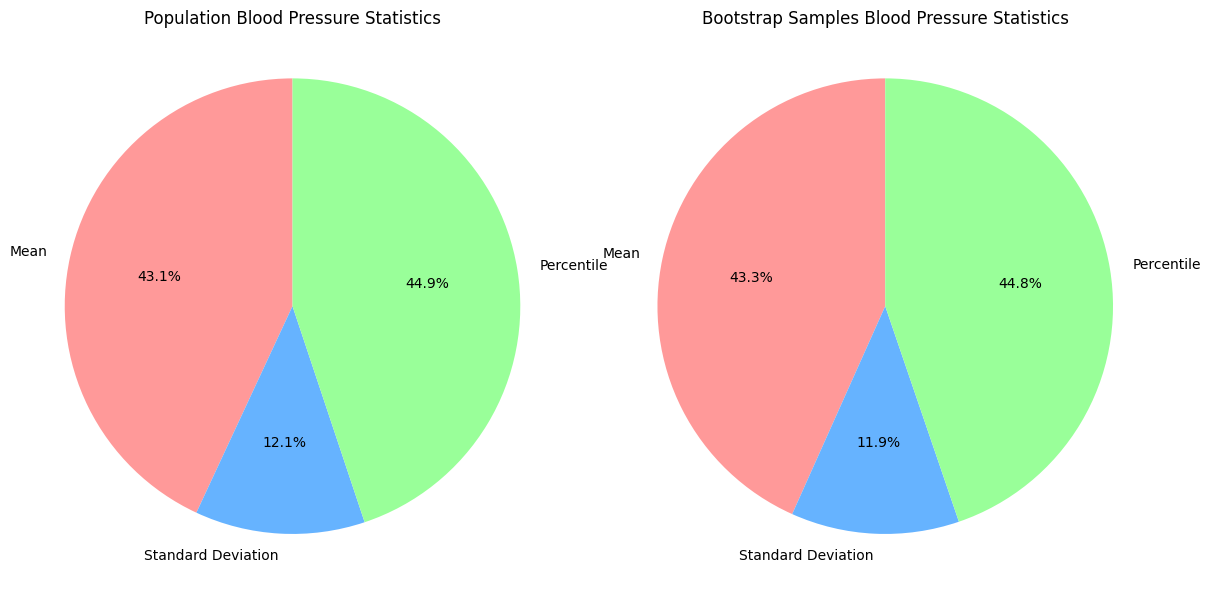

In [ ]:
# Create pie chart to compare mean, standard deviation, and percentile
labels = ['Mean', 'Standard Deviation', 'Percentile']
population_values = [population_mean_bp, population_std_dev_bp, population_percentile_bp]
bootstrap_values = [avg_bootstrap_mean, avg_bootstrap_std_dev, avg_bootstrap_percentile]

plt.figure(figsize=(12, 6))

# Population pie chart
plt.subplot(1, 2, 1)
plt.pie(population_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Population Blood Pressure Statistics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Bootstrap samples pie chart
plt.subplot(1, 2, 2)
plt.pie(bootstrap_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Bootstrap Samples Blood Pressure Statistics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()